In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [2]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법(후진제거법)
from sklearn.feature_selection import RFE
#Scale 변환
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('체질검사.csv', engine = 'python')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### BMI 파생변수 생성

In [5]:
df['BMI'] = (df['WEIGHT']*0.45/((df['HEIGHT']*0.0254)**2)).round(1)

In [6]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3


### 체질비만도와 설명변수들간의 선형관계 확인

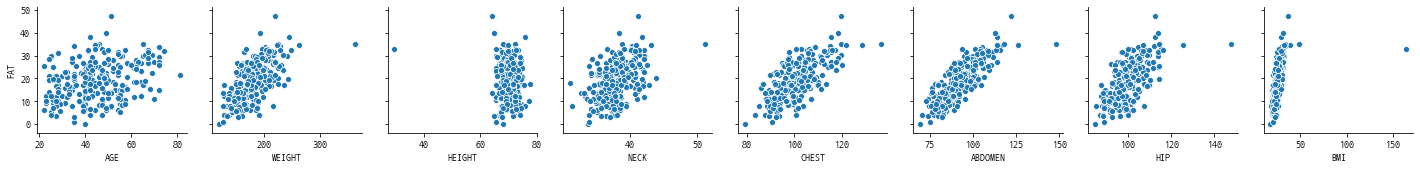

In [7]:
sns.pairplot(df, y_vars ="FAT", x_vars = ['AGE','WEIGHT','HEIGHT','NECK','CHEST','ABDOMEN','HIP','BMI'])

FAT과 WEIGTH, HEIGHT 변수간의 산점도를 본 결과, 이상치가 발견되었음 -> 이상치 제거

In [8]:
df.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.734921
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.482274
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,17.900000
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,22.900000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,24.900000
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.100000
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,164.300000


In [9]:
df[df['HEIGHT']<40]

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
78,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.3


In [10]:
df[df['WEIGHT']>300]

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5


In [11]:
df = df[df['HEIGHT']>40]
df.reset_index(inplace=True)
df.head()

,index,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3


WEIGHT의 이상치는 BMI의 값이 50미만이므로 제거하지않고, HEIGHT의 이상치는 164.3이므로 제거한다.

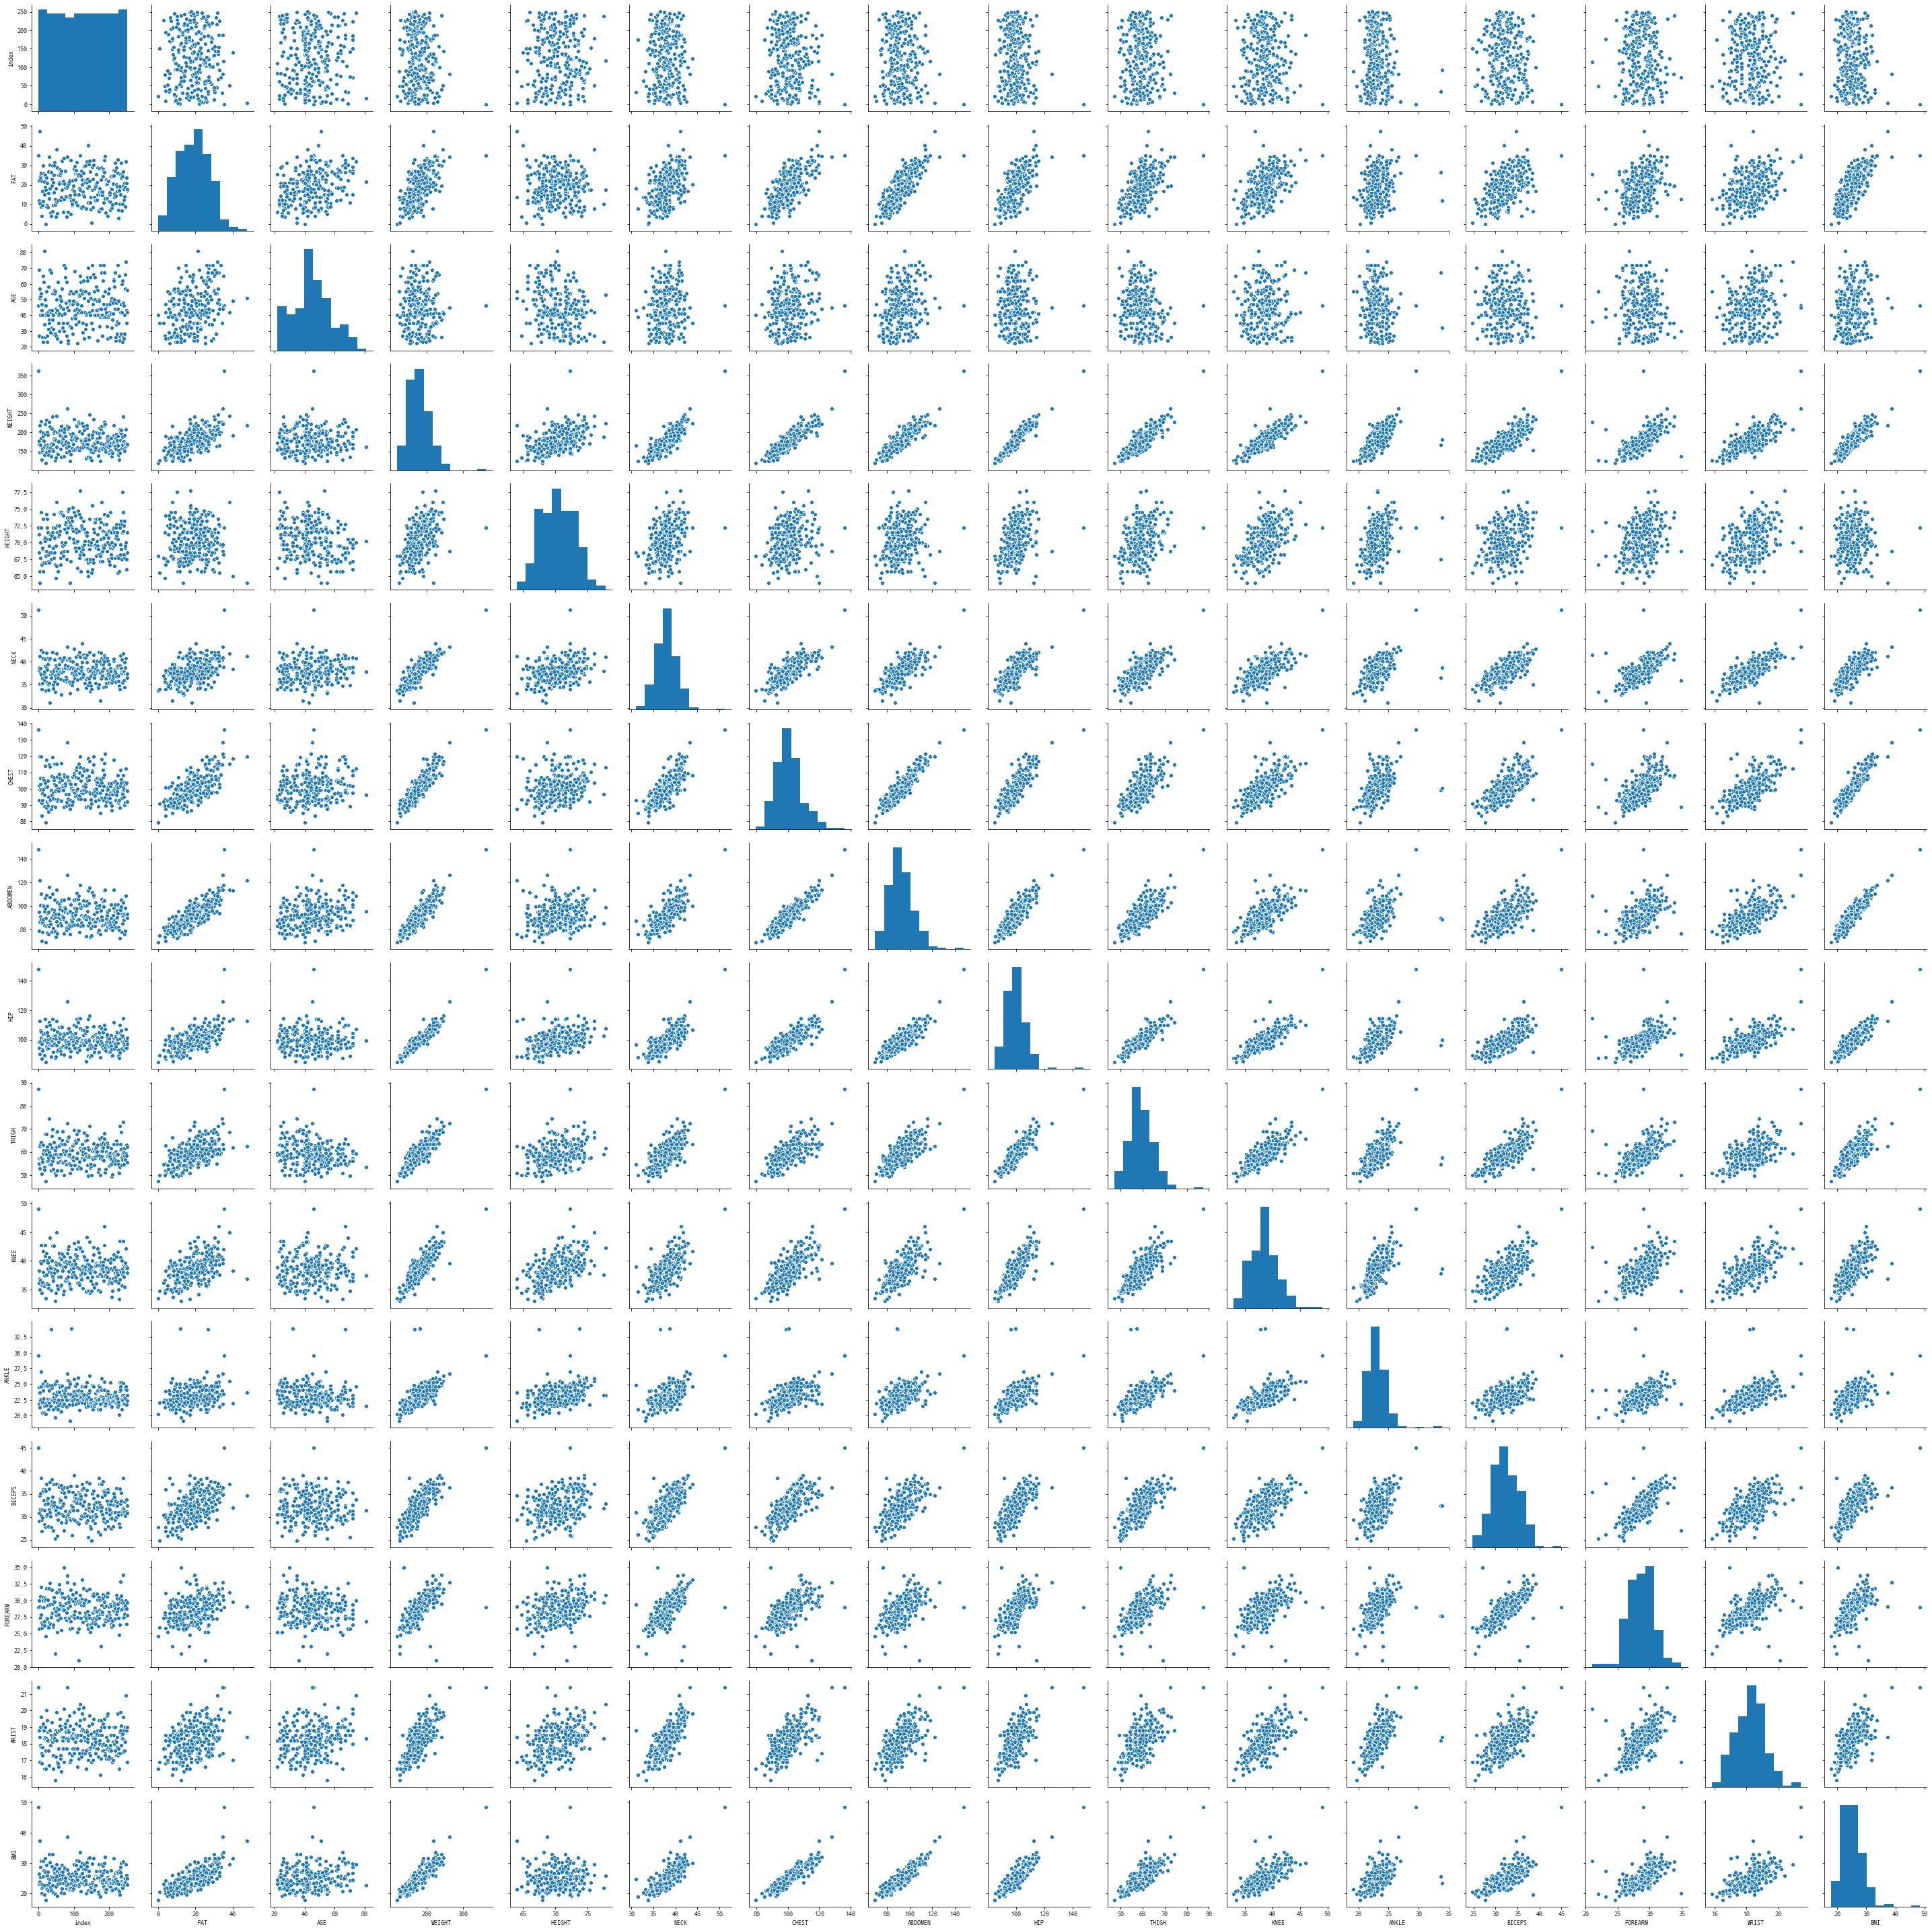

In [12]:
sns.pairplot(df)

설명변수 WEIGHT,NECK,CHEST,ABDOMEN,HIP간에 선형관계를 확인할 수 있다.

In [13]:
reg_model = smf.ols(formula = 'FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+\
                    THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI', data = df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     51.73
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.01e-63
Time:                        23:47:27   Log-Likelihood:                -711.92
No. Observations:                 251   AIC:                             1454.
Df Residuals:                     236   BIC:                             1507.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -152.0619     52.590     -2.891      0.0

모든 변수를 포함한 회귀분석 결과, R_squared 값은 0.754이다.


### 다중공선성

In [14]:
df_x = df.drop("FAT", axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,index,1.052
11,ANKLE,1.958
13,FOREARM,2.259
2,AGE,2.268
14,WRIST,3.395
12,BICEPS,3.676
5,NECK,4.449
10,KNEE,4.921
9,THIGH,7.910
6,CHEST,10.743


WEIGHT의 다중공선성이 가장 높으므로 제거하고 다시 회귀분석을 진행

In [15]:
# Weight 변수 제거
reg_model = smf.ols(formula = 'FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+\
                    THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI', data= df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     52.97
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.57e-62
Time:                        23:47:27   Log-Likelihood:                -717.06
No. Observations:                 251   AIC:                             1462.
Df Residuals:                     237   BIC:                             1511.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8119      8.957      1.207      0.2

In [16]:
df_x = df.drop(["FAT","WEIGHT"], axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
1,index,1.047
10,ANKLE,1.958
12,FOREARM,2.205
2,AGE,2.268
13,WRIST,3.395
11,BICEPS,3.629
4,NECK,4.341
9,KNEE,4.778
3,HEIGHT,5.895
8,THIGH,7.874


In [17]:
# Weight , BMI 변수 제거
reg_model = smf.ols(formula = 'FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+\
                    THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST', data= df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     57.61
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.07e-63
Time:                        23:47:27   Log-Likelihood:                -717.09
No. Observations:                 251   AIC:                             1460.
Df Residuals:                     238   BIC:                             1506.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3921      8.737      1.189      0.2

In [18]:
df_x = df.drop(["FAT","WEIGHT","BMI"], axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
1,index,1.044
3,HEIGHT,1.757
10,ANKLE,1.862
2,AGE,2.182
12,FOREARM,2.195
13,WRIST,3.311
11,BICEPS,3.513
4,NECK,3.952
9,KNEE,4.768
8,THIGH,7.758


WEIGHT 과 BMI를 제거한 후의 다중 공선성 

### 후진제거법

In [19]:
df_y = df['FAT']
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_x, df_y)
#선택된 변수
selected_cols = df_x.columns[rfe.support_]
#제거된 변수 
removed_cols = df_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
removed Variables: Index(['index', 'AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [20]:
rfe_reg_model = smf.ols(formula = "FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST", data = df)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     132.5
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.45e-67
Time:                        23:47:27   Log-Likelihood:                -723.73
No. Observations:                 251   AIC:                             1459.
Df Residuals:                     245   BIC:                             1481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5851      6.224      0.415      0.6

## 결론
설명변수 표준화하기 전의 회귀식
FAT = 12.7612-0.4142*HEIGHT-0.6226*NECK+0.7937*ABDOMEN+0.3768*FOREARM-1.3772*WRIST<br>
모든 설명변수의 T검정의 P_value 값이 0.05보다 작기때문에 모두 유의한 변수들이다.<br>
R-squared값은 0.725이며 F검정 또한 pvalue값이 0.05보다 작기 때문에 회귀모형이 적합하다고 할 수 있다.

In [21]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.443
1,NECK,3.602
3,HIP,4.778
2,ABDOMEN,4.803
0,const,507.331


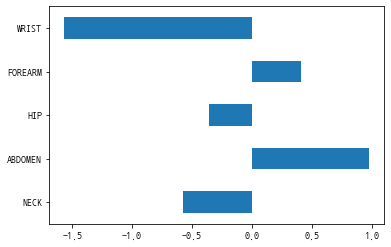

In [22]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

### 표준화 회귀분석

In [23]:
scaler = StandardScaler()

cols = df_x.columns

np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["FAT"]=df["FAT"]
reg_model_scaled = smf.ols(formula = "FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     132.5
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.45e-67
Time:                        23:47:28   Log-Likelihood:                -723.73
No. Observations:                 251   AIC:                             1459.
Df Residuals:                     245   BIC:                             1481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0960      0.276     69.106      0.0

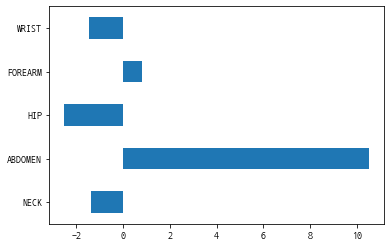

In [24]:
df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

## 결론
설명변수 표준화한 후의 회귀식
FAT = 19.0960-1.0807*HEIGHT-1.5126*NECK+8.5382*ABDOMEN+0.7615*FOREARM-1.2837*WRIST

변수의 중요도는 표준화하기 전에는 WRIST가 가장 컸지만, 표준화한 이후에는 ABDOMEN가 가장 크다

## 잔차의 정규성, 등분산성, 독립성 검정

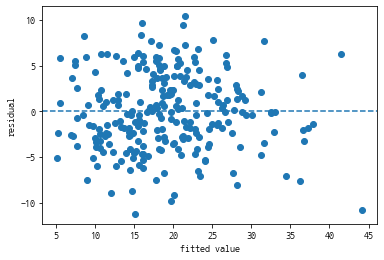

In [27]:
plt.scatter(reg_result_scaled.fittedvalues, reg_result.resid)
plt.xlabel("fitted value");plt.ylabel("residual")
plt.axhline(y = 0, linestyle="--")

0을 중심으로 랜덤하게 분포되어있는 것으로 보아 잔차의 등분산성을 만족한다.

잔차의 독립성은 Durbin-Watson의 값이 2.119으로 2에 가깝기 때문에 독립성을 만족한다.

NormaltestResult(statistic=2.732188391478822, pvalue=0.25510139236382423)

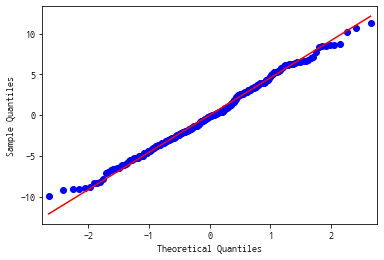

In [28]:
qqplot(reg_result_scaled.resid, line = "q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0)

정규성 검정 결과 pvalue값이 0.255이므로 잔차의 정규성을 만족한다고 할 수 있다.